<a href="https://colab.research.google.com/github/Profvmarques/cienciadedados/blob/main/Bolsonaro_Bots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install upsetplot

  Created wheel for upsetplot: filename=UpSetPlot-0.6.0-py3-none-any.whl size=18092 sha256=3f6244eab6633537c7d8806920de6a3f1f82b0e763676e6c84561b382a9da72c
  Stored in directory: /root/.cache/pip/wheels/e8/f9/4a/b71b6b3194361ca612f42135e8e35698ce60144b167dbb19e3
Successfully built upsetplot


In [ ]:
!wget https://botsentinel.com/reports/documents/jair-bolsonaro/jair_bolsonaro_followers.txt
!wget https://botsentinel.com/reports/documents/damares-alves/damares_alves_followers.txt
!wget https://botsentinel.com/reports/documents/flavio-bolsonaro/flavio_bolsonaro_followers.txt
!wget https://botsentinel.com/reports/documents/carla-zambelli/carlazambelli38_followers.txt
!wget https://botsentinel.com/reports/documents/gen-heleno/gen_heleno_followers.txt

--2022-04-29 21:22:32--  https://botsentinel.com/reports/documents/jair-bolsonaro/jair_bolsonaro_followers.txt
Resolving botsentinel.com (botsentinel.com)... 172.66.43.148, 172.66.40.108, 2606:4700:3108::ac42:286c, ...
Connecting to botsentinel.com (botsentinel.com)|172.66.43.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘jair_bolsonaro_followers.txt’

jair_bolsonaro_foll     [  <=>               ]   4.48M  20.6MB/s    in 0.2s    

2022-04-29 21:22:33 (20.6 MB/s) - ‘jair_bolsonaro_followers.txt’ saved [4697335]

--2022-04-29 21:22:33--  https://botsentinel.com/reports/documents/damares-alves/damares_alves_followers.txt
Resolving botsentinel.com (botsentinel.com)... 172.66.43.148, 172.66.40.108, 2606:4700:3108::ac42:286c, ...
Connecting to botsentinel.com (botsentinel.com)|172.66.43.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘damares_alves_followers.

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

pd.options.plotting.backend = "plotly"

list_df = {}
for file in os.listdir('.'):
  if file[-3:] == 'txt':
    print(file)
    list_df[file[:-14]] = pd.read_csv(file)
    list_df[file[:-14]].columns = [c.strip() for c in list_df[file[:-14]].columns]
    list_df[file[:-14]]['JOINED'] = list_df[file[:-14]]['JOINED'].astype("datetime64")

rel = np.zeros( (len(list_df), len(list_df)) )
for r, i in enumerate(list_df.keys()):
  for c, j in enumerate(list_df.keys()):
    merge = list_df[i][['ID']].merge(list_df[j][['ID']])
    rel[r][c] = len(merge)


list_df['jair_bolsonaro'].head()

carlazambelli38_followers.txt
gen_heleno_followers.txt
jair_bolsonaro_followers.txt
flavio_bolsonaro_followers.txt
damares_alves_followers.txt


,ID,HANDLE,JOINED,TWEETS,FOLLOWING,FOLLOWERS
0,1519064533347749889,ThallesRyan_,2022-04-26 21:23:36,0,15,0
1,1519066338546827265,JorgePi09564904,2022-04-26 21:31:01,0,3,0
2,1519064137808154626,valente1405,2022-04-26 21:22:10,0,8,0
3,1519059395073789961,Marco_HOliveira,2022-04-26 21:04:21,0,14,0
4,1519066906174664705,Roberto02749147,2022-04-26 21:32:51,0,8,0


In [ ]:
users = pd.DataFrame()
s = 0
follows = []
for key in list_df.keys():
  users = users.append(list_df[key])
  follows.extend([key]*len(list_df[key]))
  s+= len(list_df[key])
users['FOLLOWS'] = follows
follows = users.groupby('HANDLE')['FOLLOWS'].apply(list)
users.drop('FOLLOWS', axis=1, inplace=True)
users.drop_duplicates(subset='HANDLE', inplace=True)
users

,ID,HANDLE,JOINED,TWEETS,FOLLOWING,FOLLOWERS
0,1519310282358669312,galli_lucy,2022-04-27 13:40:20,2,15,0
1,1519310148883423234,LidiaLe19439638,2022-04-27 13:39:35,0,3,0
2,1519308366425825280,JozianeGomes9,2022-04-27 13:32:16,0,25,0
3,1519310018918629376,joseamaral96,2022-04-27 13:38:39,0,16,0
4,1519310565277057025,kokichitakeuchi,2022-04-27 13:40:59,0,9,0
...,...,...,...,...,...,...
39831,1518400723633033220,HugoMir01816698,2022-04-25 01:25:28,9,68,4
39833,1518400318689718272,sementesantaofc,2022-04-25 01:24:24,0,5,1
39851,1518386849588338688,henrique2mc2,2022-04-25 00:30:21,1,39,1
39855,1518386332770390019,DionathanBarre2,2022-04-25 00:28:36,0,25,0


In [ ]:
df = pd.DataFrame(columns=['Usuário', 'Num. seguidores'])
df['Usuário'] = list(list_df.keys())
df['Num. seguidores'] = [len(list_df[key]) for key in list_df.keys()]
df = df.sort_values('Num. seguidores')
px.bar(df, x='Usuário', y='Num. seguidores')

In [ ]:
count = users['JOINED'].value_counts()
count.sort_index().cumsum().plot(kind='area')

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['TWEETS', 'FOLLOWERS'])

tweets = users['TWEETS']
tweets = tweets[tweets.between(tweets.quantile(.15), tweets.quantile(.85))]
fig1 = px.bar(tweets.value_counts())
fig.add_trace(fig1.data[0], row=1, col=1)

foll = users['FOLLOWERS']
foll = foll[foll.between(foll.quantile(.15), foll.quantile(.85))]
fig2 = px.bar(foll.value_counts())
fig.add_trace(fig2.data[0], row=1, col=2)

# users[['TWEETS', 'FOLLOWERS']].plot(kind='box', orientation='h')

## Intersecção entre contas

{'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x7f1436657cd0>,
 'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x7f14367bf110>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x7f1436617f90>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x7f1436628d50>}

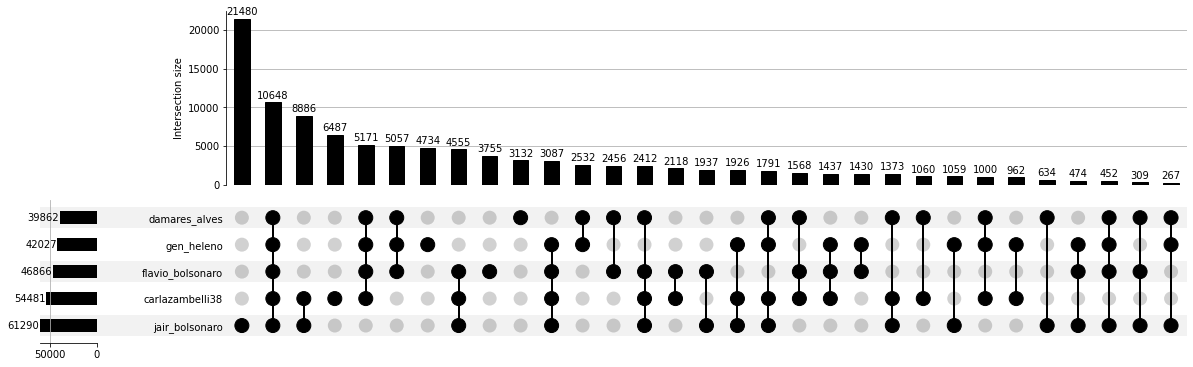

In [ ]:
from upsetplot import plot, from_contents, from_memberships

counts = follows.value_counts()
counts = counts.iloc[:-2]

sets = from_memberships(counts.index, data=counts.to_numpy())
# fig = plt.figure(figsize=(30, 5))
plot(sets, sort_by='cardinality', show_counts=True, element_size=40)

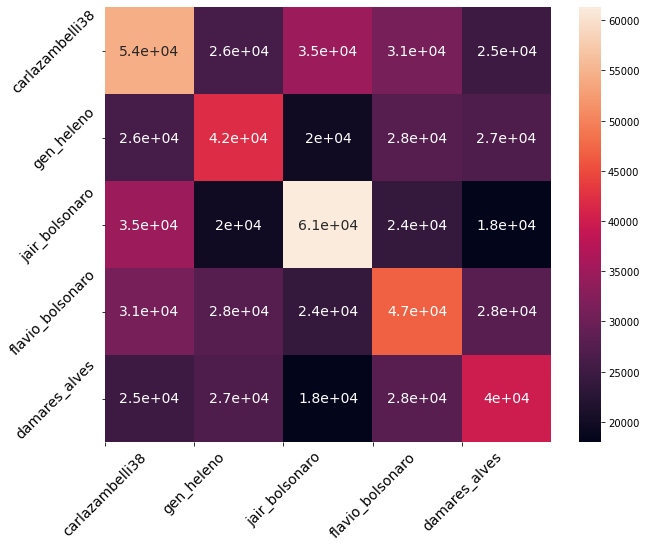

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(rel, annot=rel, annot_kws={"fontsize":14})
plt.xticks(np.arange(5), list(list_df.keys()), rotation=45, fontsize=14)
plt.yticks(np.arange(5)+0.5, list(list_df.keys()), rotation=45, fontsize=14)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(list_df.keys())*2,
    ),
    link = dict(
      source = arr[:, 0],
      target = arr[:, 1],
      value = value
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
names = {'damares_alves': 0, 'carlazambelli38': 1, 'jair_bolsonaro': 2, 'gen_heleno': 3, 'flavio_bolsonaro': 4}

from itertools import permutations
perm = permutations(list(list_df.keys()), 2)
arr = []
value = []
for k, p in enumerate(perm):
  arr.append([names[p[0]], names[p[1]]+5])
  value.append(rel[names[p[0]]][names[p[1]]])

arr = np.asarray(arr)